In [ ]:
___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

Data vocabulary:

1. #3 (age): age in years 
2. #4 (sex): sex (1 = male; 0 = female) 
3. #9 (cp): cp: chest pain type | Value 0: typical angina | Value 1: atypical angina | Value 2: non-anginal pain | Value 3: asymptomatic 
4. #10 (trestbps): resting blood pressure (in mm Hg on admission to the hospital) 
5. #12 (chol): serum cholestoral in mg/dl 
6. #16 (fbs): (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
7. #19 (restecg): resting electrocardiographic results | Value 0: normal | Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) | Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria 
8. #32 (thalach): maximum heart rate achieved 
9. #38 (exang): exercise induced angina (1 = yes; 0 = no) 
10. #40 (oldpeak): ST depression induced by exercise relative to rest 
11. #41 (slope): the slope of the peak exercise ST segment | Value 1: upsloping | Value 2: flat | Value 3: downsloping 
12. #44 (ca): number of major vessels (0-3) colored by flourosopy 
13. #51 (thal): 3 = normal; 6 = fixed defect; 7 = reversable defect 
14. #58 (num) (the predicted attribute): Value 0: < 50% diameter narrowing | Value 1: > 50% diameter narrowing 


* https://archive.ics.uci.edu/ml/datasets/heart+disease

# Import esential Libraries

In [ ]:

#!conda install -c districtdatalabs yellowbrick 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#import pandas_profiling as pp
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, log_loss, recall_score,accuracy_score,precision_score,f1_score
#from yellowbrick.classifier import ConfusionMatrix
#from yellowbrick.cluster import KElbowVisualizer
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

In [3]:
import pandas as pd

# Ingest the data to notebook

In [4]:
df = pd.read_csv('heart.csv')

In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
df['cp']=df['cp'].replace({0:'typical angina',1:'atypical angina',2:'non-anginal pain',3:'asymptomatic'})

In [7]:
df['restecg']=df['restecg'].replace({0:'normal',1:'having ST-T wave abnormality',2:'left ventricular hypertrophy'})

In [8]:
df['slope']=df['slope'].replace({1:'upsloping',2:'flat',3:'downsloping'})

In [9]:
df['thal']=df['thal'].replace({0:'normal',1 :'normal', 2:'fixed defect', 3:'reversable defect'})

In [10]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,asymptomatic,145,233,1,normal,150,0,2.3,0,0,normal,1
1,37,1,non-anginal pain,130,250,0,having ST-T wave abnormality,187,0,3.5,0,0,fixed defect,1
2,41,0,atypical angina,130,204,0,normal,172,0,1.4,flat,0,fixed defect,1
3,56,1,atypical angina,120,236,0,having ST-T wave abnormality,178,0,0.8,flat,0,fixed defect,1
4,57,0,typical angina,120,354,0,having ST-T wave abnormality,163,1,0.6,flat,0,fixed defect,1


# EDA

In [11]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,asymptomatic,145,233,1,normal,150,0,2.3,0,0,normal,1
1,37,1,non-anginal pain,130,250,0,having ST-T wave abnormality,187,0,3.5,0,0,fixed defect,1
2,41,0,atypical angina,130,204,0,normal,172,0,1.4,flat,0,fixed defect,1
3,56,1,atypical angina,120,236,0,having ST-T wave abnormality,178,0,0.8,flat,0,fixed defect,1
4,57,0,typical angina,120,354,0,having ST-T wave abnormality,163,1,0.6,flat,0,fixed defect,1


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    object 
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    object 
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    object 
 11  ca        303 non-null    int64  
 12  thal      303 non-null    object 
 13  target    303 non-null    int64  
dtypes: float64(1), int64(9), object(4)
memory usage: 33.3+ KB


In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2
ca,303.0,0.729373,1.022606,0.0,0.0,0.0,1.0,4.0
target,303.0,0.544554,0.498835,0.0,0.0,1.0,1.0,1.0


In [14]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [15]:
df.value_counts("thal")

thal
fixed defect         166
reversable defect    117
normal                20
dtype: int64

In [16]:
df.shape

(303, 14)

In [17]:
df.target.value_counts(normalize = True)

1    0.544554
0    0.455446
Name: target, dtype: float64

<AxesSubplot:xlabel='target', ylabel='count'>

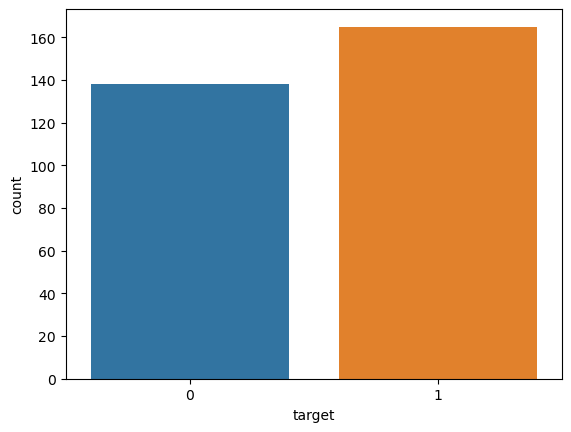

In [18]:
sns.countplot(df.target)

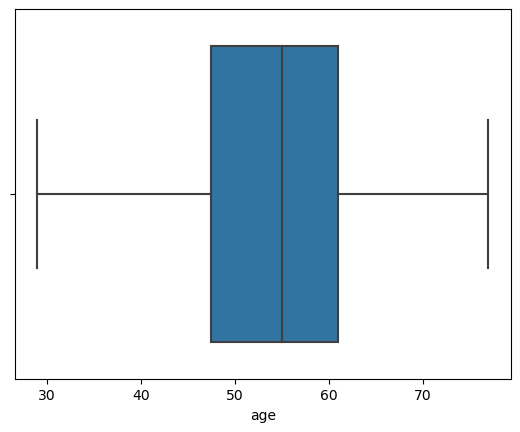

In [19]:
sns.boxplot(df.age);

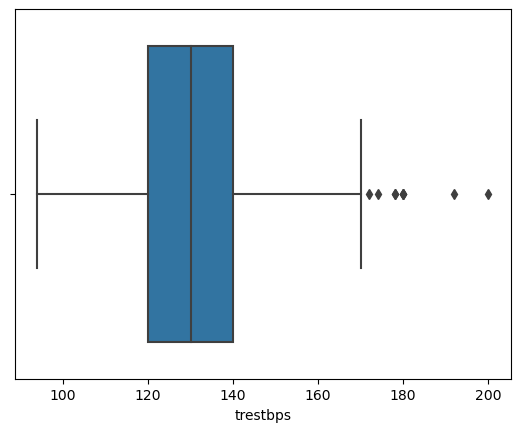

In [20]:
sns.boxplot(df.trestbps); # dinlenme kan basıncı

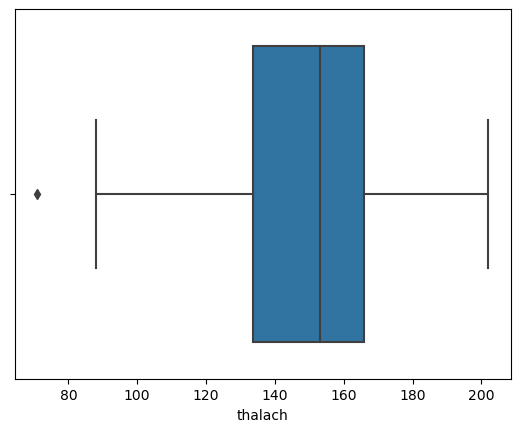

In [21]:
sns.boxplot(df.thalach);  # max kalp atışı

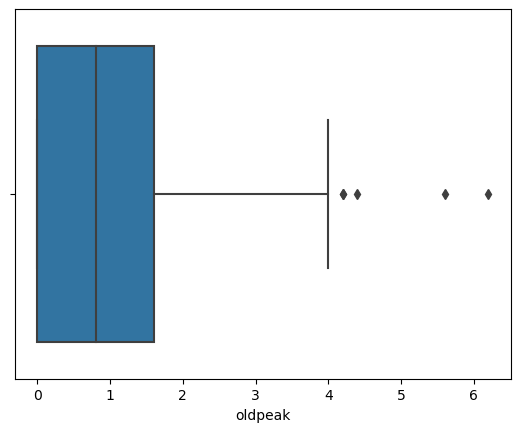

In [22]:
sns.boxplot(df.oldpeak);  # egzersize bağlı st depresyonu

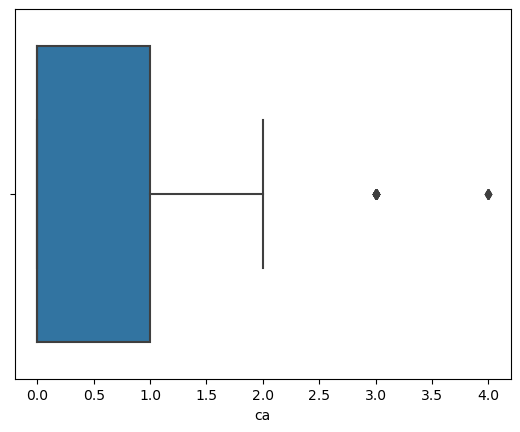

In [23]:
sns.boxplot(df.ca);  # büyük kan damar sayısı

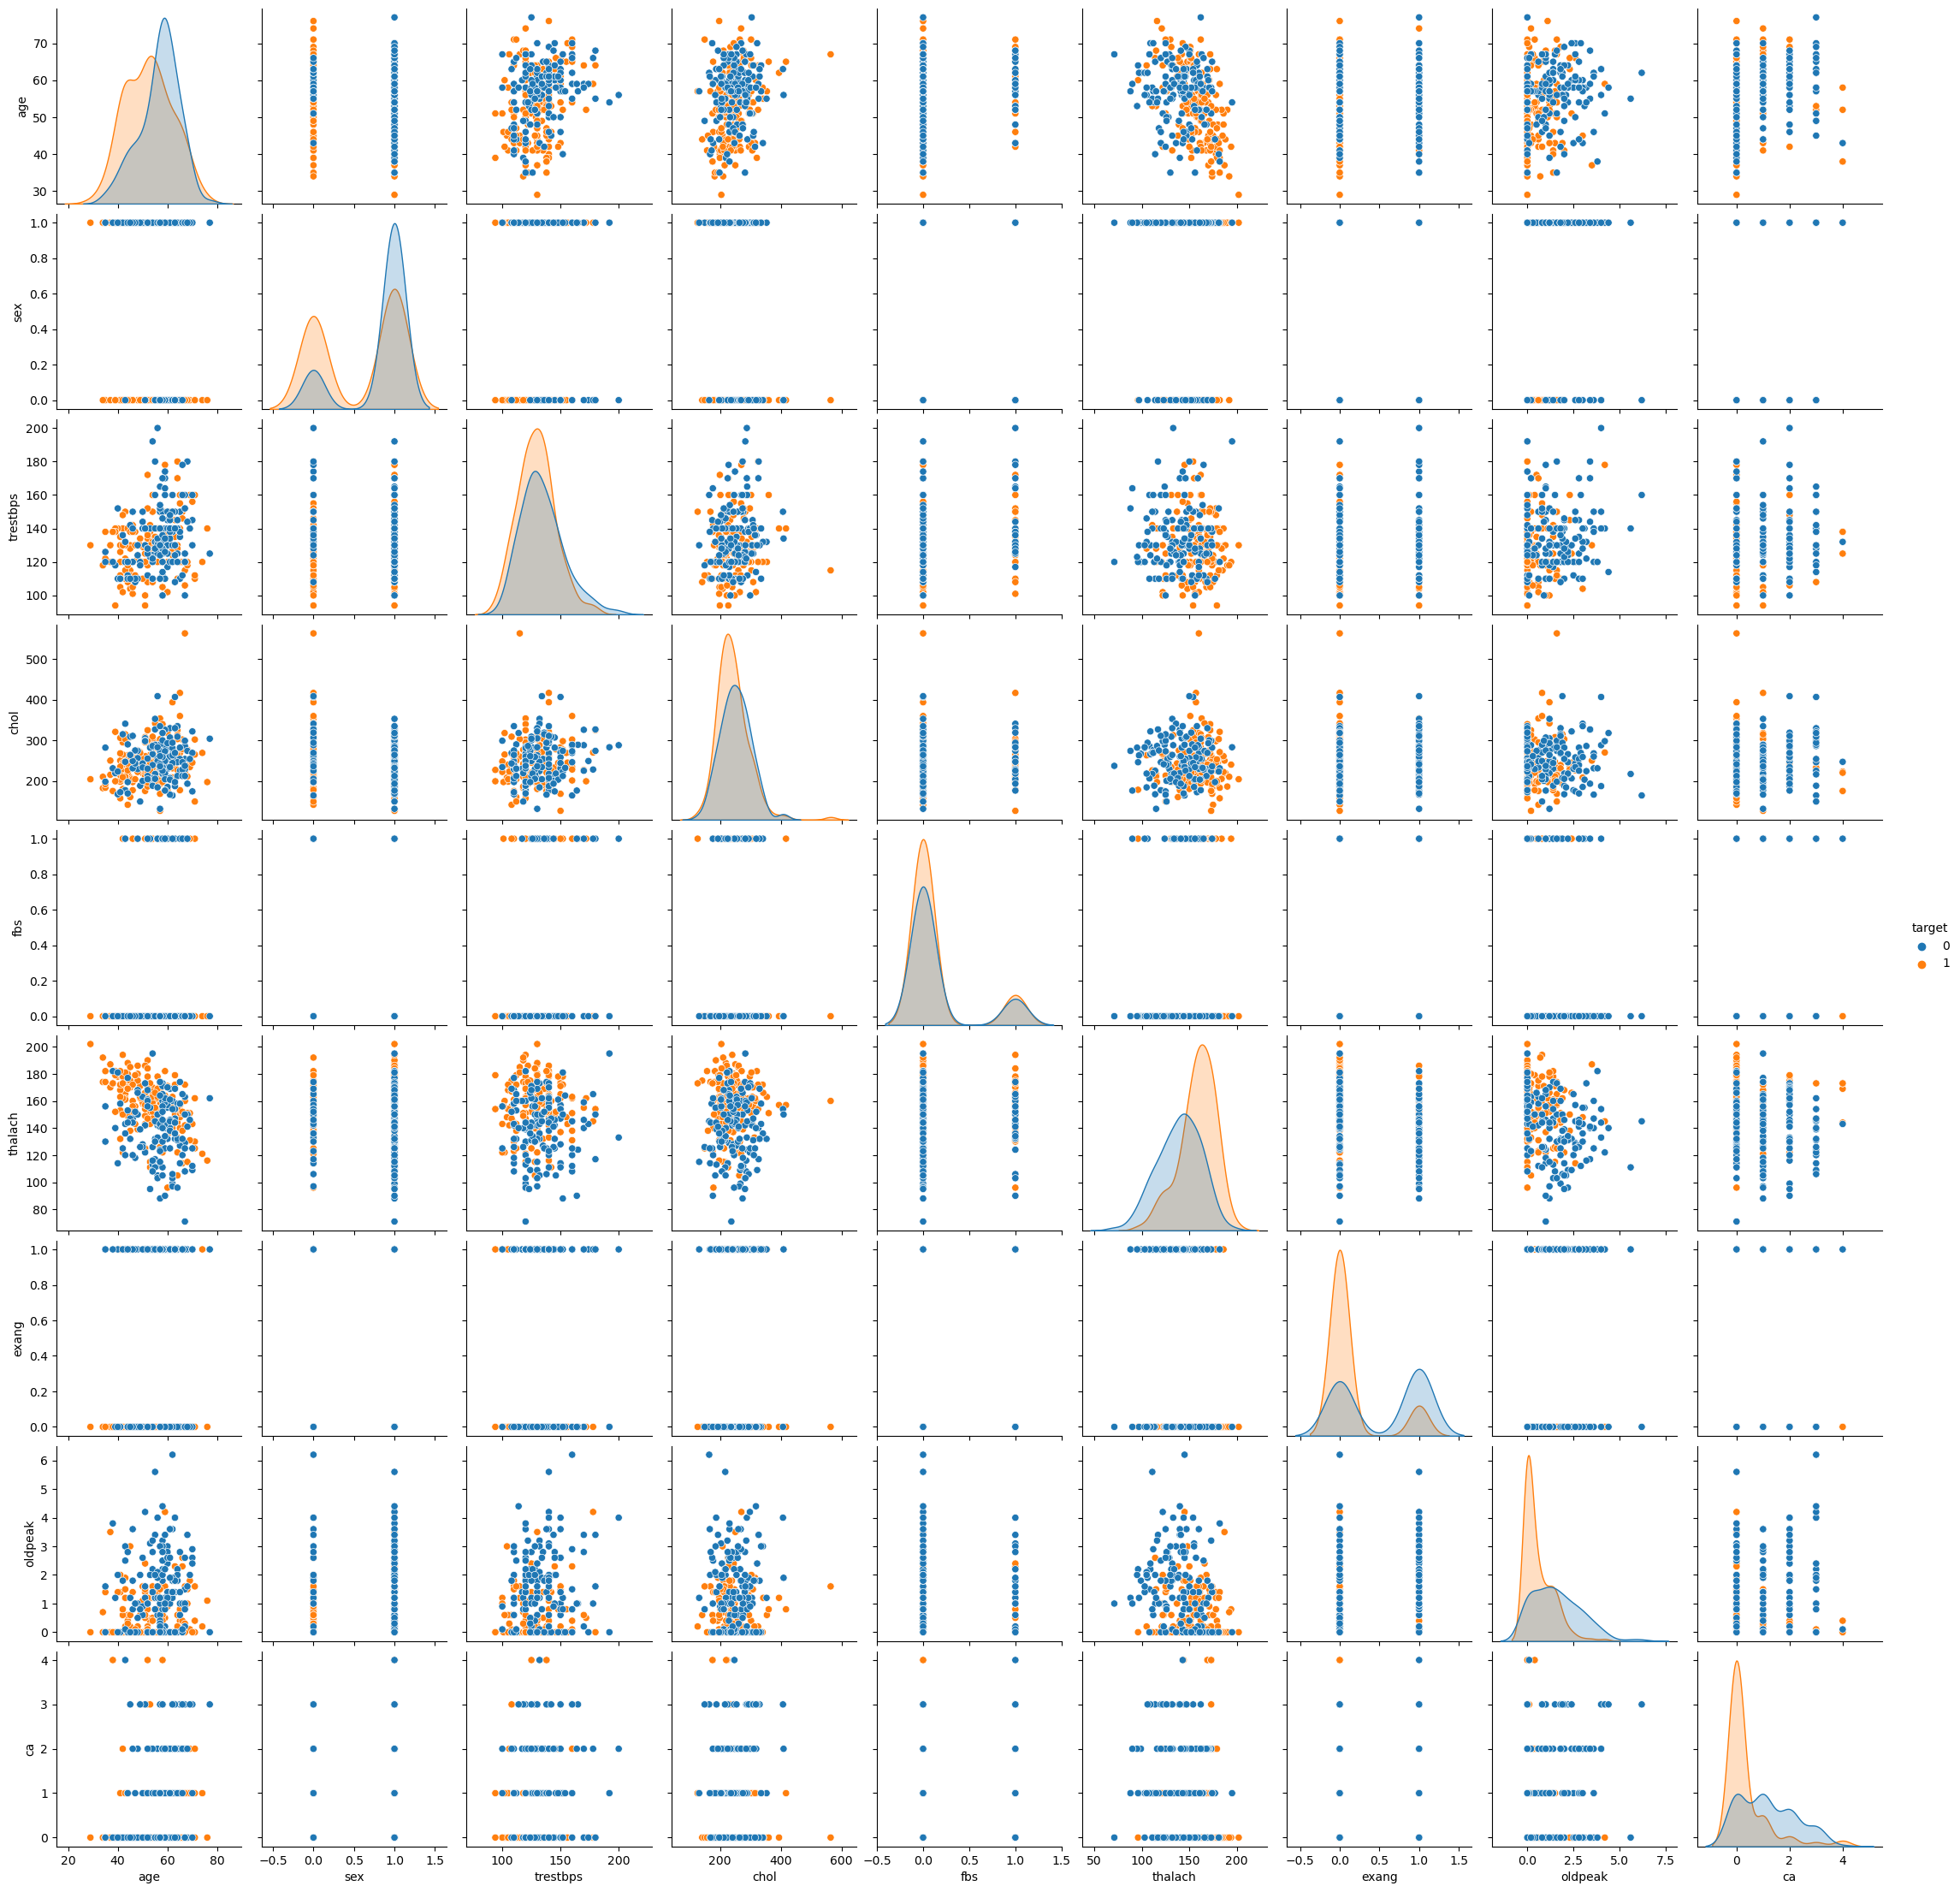

In [24]:
sns.pairplot(df.select_dtypes(include="number"), hue = "target")

<AxesSubplot:>

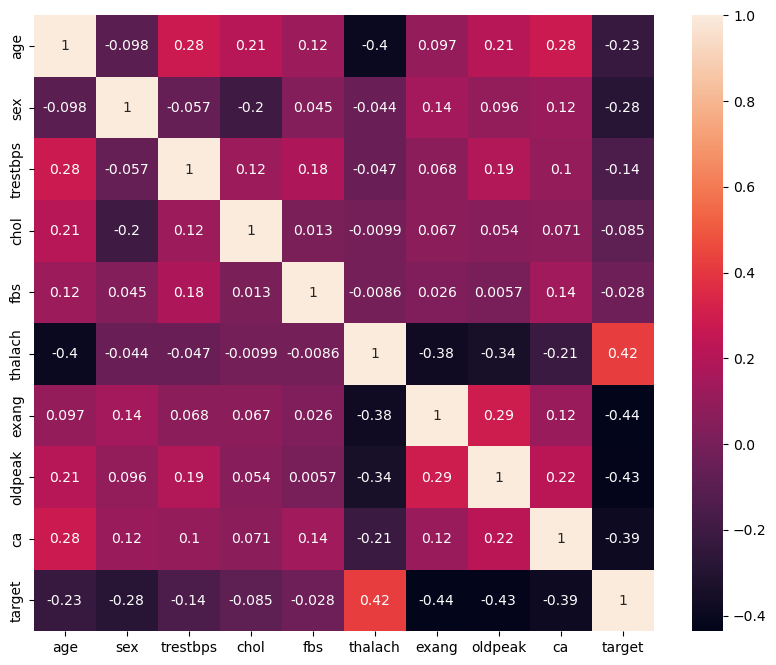

In [25]:
plt.figure(figsize=(10,8))
sns.heatmap(df.select_dtypes(include="number").corr(), annot=True)

# Data Preprocessing

In [26]:
df=pd.get_dummies(df,drop_first=True)
df.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,target,cp_atypical angina,cp_non-anginal pain,cp_typical angina,restecg_left ventricular hypertrophy,restecg_normal,slope_flat,slope_upsloping,thal_normal,thal_reversable defect
0,63,1,145,233,1,150,0,2.3,0,1,0,0,0,0,1,0,0,1,0
1,37,1,130,250,0,187,0,3.5,0,1,0,1,0,0,0,0,0,0,0
2,41,0,130,204,0,172,0,1.4,0,1,1,0,0,0,1,1,0,0,0
3,56,1,120,236,0,178,0,0.8,0,1,1,0,0,0,0,1,0,0,0
4,57,0,120,354,0,163,1,0.6,0,1,0,0,1,0,0,1,0,0,0


In [27]:
X = df.drop(["target"], axis = 1)
y = df["target"]

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=42) #stratify parameter will preserve the proportion of target as in original dataset, in the train and test datasets as well.

#So if your original dataset df has target/label as [0,1,2] in the ratio say, 40:30:30. That is, for every 100 datasets, you can find 40, 30 and 30 observations of target 0,1 and 2 respectively.

# Elbow Method for Choosing Reasonable K Values

# Visually compare models based on your chosen metric

# Chose best model and make a random prediction 